<a href="https://colab.research.google.com/github/hasim-hairlahovic/music-recommendation-system/blob/main/Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Problem Definition**

**The context:** The music industry is huge and number of songs available or released daily is overwhelming. It is very difficult to do a ‘raw’ music search without the help of recommender system. Also, music exploration can be tedious and time consuming.<br>
**The objectives:** The goal is to develop a music recommendation system that will propose top 10 songs for a user based on the likelihood of listening to those songs<br>
**The key questions:** Can we develop a recommendation system based on the available data?
What are the most popular songs listened by users?
Is there underlying trend in the data?
Can top performing model identify top ten songs for a user?
<br>
**The problem formulation:** The main objective is to develop a machine learning model that will recommend songs to the user based historical data that’s available. In this case we’ll focus on the user song preferences in the data. Proposing top 10 songs for a user can be automated and enhanced using Machine Learning (ML) models. Specifically in this case, we’ll try to test multiple ML models to get the best results. One of the main advantages of using data science and ML for this problem is speed and scalability especially given that music industry grows exponentially along with the data that’s been generated.



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/MIT_ML/Music_Recommendation_System/

/content/drive/My Drive/Colab Notebooks/MIT_ML/Music_Recommendation_System


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'
df = pd.merge(count_df[['user_id','song_id','play_count']], song_df.drop_duplicates(), on='song_id', how='left')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Apply label encoding for "user_id" and "song_id"
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
df

,user_id,song_id,play_count,title,release,artist_name,year
202,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
203,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
204,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
205,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
...,...,...,...,...,...,...,...
2054290,47786,9847,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006
2054291,47786,9858,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes,2000
2054292,47786,9890,2,Cool Dry Place (2007 Remastered LP Version),Traveling Wilburys Vol. 3,Traveling Wilburys,0
2054293,47786,9954,3,Let's Live For Today,150 Rock 'N' Roll Classics,The Grass Roots,1987


In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df[df['play_count'] <= 5]

In [ ]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year
202,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
203,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
204,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
205,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
...,...,...,...,...,...,...,...
2054290,47786,9847,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006
2054291,47786,9858,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes,2000
2054292,47786,9890,2,Cool Dry Place (2007 Remastered LP Version),Traveling Wilburys Vol. 3,Traveling Wilburys,0
2054293,47786,9954,3,Let's Live For Today,150 Rock 'N' Roll Classics,The Grass Roots,1987


In [ ]:
#df_final.to_csv('milestone_1_final.csv', encoding='utf-8', index=False)

In [ ]:
# Check the shape of the data
df_final.shape

(426811, 7)

 **Music Recommendation System**

In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
df_final = pd.read_csv('milestone_1_final.csv')

In [ ]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year,artist_title
0,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995,Neutral Milk Hotel - Aunt Eggma Blowtorch
1,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008,Miley Cyrus - Full Circle
2,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008,Man Man - Poor Jackie
3,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008,Katy Perry - Hot N Cold (Manhattan Clique Remi...
4,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Erin McKeown - Daisy And Prudence
...,...,...,...,...,...,...,...,...
426806,47786,9847,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006,Amy Winehouse - He Can Only Hold Her
426807,47786,9858,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes,2000,Bright Eyes - Drunk Kid Catholic
426808,47786,9890,2,Cool Dry Place (2007 Remastered LP Version),Traveling Wilburys Vol. 3,Traveling Wilburys,0,Traveling Wilburys - Cool Dry Place (2007 Rema...
426809,47786,9954,3,Let's Live For Today,150 Rock 'N' Roll Classics,The Grass Roots,1987,The Grass Roots - Let's Live For Today


In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()       # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()       # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
0,1.000000,11
1,1.659574,47
2,2.000000,7
3,2.416667,12
4,1.469388,49


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(final_play, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq']>min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play,10,50))

[7224, 6450, 8324, 9942, 5840, 4237, 8483, 5531, 657, 5653]

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 7.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626457 sha256=694556341504f47c43bcb594bf86a4f18f7baaf3f42626f50b5e66ee47c88b62
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
from optparse import Values
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index='user_id', columns='song_id', values='play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id,est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

  return ranked_songs

### Content Based Recommendation Systems

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title']+' '+df_small['release']+' '+df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,artist_title,text
0,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995,Neutral Milk Hotel - Aunt Eggma Blowtorch,Aunt Eggma Blowtorch Everything Is Neutral Mil...
1,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008,Miley Cyrus - Full Circle,Full Circle Breakout Miley Cyrus
2,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008,Man Man - Poor Jackie,Poor Jackie Rabbit Habits Man Man
3,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008,Katy Perry - Hot N Cold (Manhattan Clique Remi...,Hot N Cold (Manhattan Clique Remix Radio Edit)...
4,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Erin McKeown - Daisy And Prudence,Daisy And Prudence Distillation Erin McKeown


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Aunt Eggma Blowtorch,6958,12,1,Aunt Eggma Blowtorch Everything Is Neutral Mil...
Full Circle,6958,40,1,Full Circle Breakout Miley Cyrus
Poor Jackie,6958,151,2,Poor Jackie Rabbit Habits Man Man
Hot N Cold (Manhattan Clique Remix Radio Edit),6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit)...
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                              Aunt Eggma Blowtorch
1                                       Full Circle
2                                       Poor Jackie
3    Hot N Cold (Manhattan Clique Remix Radio Edit)
4                                Daisy And Prudence
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
cbrs_tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = cbrs_tfidf.fit_transform(df_small['text'].values).toarray()


In [ ]:
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,11271,11272,11273,11274,11275,11276,11277,11278,11279,11280
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
cosine_sim1 = cosine_similarity(song_tfidf, song_tfidf)
cosine_sim1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    indices = cold_start.indices

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(cold_start.df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', cosine_sim1)

[2023, 5436, 2006, 4592, 3577, 2021, 3524, 1985, 5221, 2001]


['Generator',
 'Stacked Actors',
 'Big Me',
 'For All The Cows',
 'Floaty',
 'Wattershed',
 'Exhausted',
 'Oh_ George',
 'X-Static',
 "I'll Stick Around"]

### Final Model

In [ ]:
#Function that finds song recommendations for a new song
def cold_start(new_song):
  #add news song to the data set
  df_small = df_final
  df_small['text'] = df_small['title']+' '+df_small['release']+' '+df_small['artist_name']
  df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
  df_small = df_small.append({'user_id':None,'song_id':None, 'play_count':0, 'title':new_song, 'text':new_song},ignore_index=True)
  df_small = df_small.drop_duplicates(subset=['title'])
  df_small = df_small.set_index('title')
  indices = pd.Series(df_small.index)


  cbrs_tfidf = TfidfVectorizer(tokenizer = tokenize)
  song_tfidf = cbrs_tfidf.fit_transform(df_small['text'].values).toarray()
  cosine_sim1 = cosine_similarity(song_tfidf, song_tfidf)

  recommended_songs = []
  idx = indices[indices == new_song].index[0]

  # Creating a Series with the similarity scores in descending order
  score_series = pd.Series(cosine_sim1[idx]).sort_values(ascending = False)

  # Getting the indexes of the 10 most similar songs
  top_10_indexes = list(score_series.iloc[1 : 11].index)
  #print(top_10_indexes)

  # Populating the list with the titles of the best 10 matching songs
  for i in top_10_indexes:
      recommended_songs.append(i)
  return recommended_songs



#### Alternating Least Square (ALS) Model

In [ ]:
bsl_options = {
    "method": "als",
    "reg_u":5,
    "reg_i": 5,
    "n_epochs": 10,
}
sim_options = {'name': 'pearson_baseline',
               'user_based':False}

# ALS Model
ALS_test = KNNBasic(bsl_options=bsl_options,sim_options=sim_options,verbose=False, random_state=1) # Use random_state = 1

# Train the algorithm on the trainset
ALS_test.fit(trainset)

# Calculate precission metrics
precision_recall_at_k(ALS_test) # Use sim_user_user model

RMSE: 1.0488
Precision:  0.45
Recall:  0.564
F_1 score:  0.501


In [ ]:
ALS_test.predict(6958, 1671, verbose = True)
ALS_test.predict(6958, 3232, verbose = True)


user: 6958       item: 1671       r_ui = None   est = 1.27   {'actual_k': 21, 'was_impossible': False}
user: 6958       item: 3232       r_ui = None   est = 1.32   {'actual_k': 19, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3159213454328342, details={'actual_k': 19, 'was_impossible': False})

In [ ]:
ALS_recommendations = get_recommendations(df_final, 6958, 5, ALS_test)
pd.DataFrame(ALS_recommendations, columns=['song_id','predicted_ratings'])


,song_id,predicted_ratings
0,110,5
1,296,5
2,406,5
3,575,5
4,691,5


In [ ]:
ranking_songs(ALS_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,296,67,5,4.877831
1,575,31,5,4.820395
2,406,17,5,4.757464
3,110,14,5,4.732739
4,691,14,5,4.732739


In [ ]:
'''
Music Recommendation System Options:
  #1 - Music recommendations for a new song
  #2 - Music recommendations for existing user_id
  #3 - Music recommendations for a new user_id
'''
#Model Parameters
new_song = "Is This Love"
user_id = 423423222323232
recommendation_option = 3
#unique data for songs
song_artist = df_final[['song_id','title','artist_name']].drop_duplicates()

if new_song not in df_final.title.values and recommendation_option==1:
  cs_songs = cold_start(new_song)
  cs_songs1 = pd.DataFrame({'song_id':cs_songs})
  cs_songs2 = pd.merge(cs_songs1,song_artist, on='song_id', how='left')
  print(cs_songs2[['song_id','artist_name','title']])

if user_id in df_final.user_id.values and recommendation_option==2:
  ALS_recommendations = get_recommendations(df_final, user_id, 10, ALS_test)
  final = ranking_songs(ALS_recommendations, final_play)
  final = pd.merge(final,song_artist, on='song_id', how='left')
  print('Musc Recommendation For',str(user_id),"user_id")
  print(final[['song_id','artist_name','title']])

if user_id not in df_final.user_id.values and recommendation_option==3:
  print('***New User*****')
  print('Musc Recommendation For',str(user_id),"user_id")
  popular_songs = pd.DataFrame({'song_id':list(top_n_songs(final_play,10,50))})
  popularity_rec =  pd.merge(popular_songs,song_artist,on='song_id',how='left')
  print(popularity_rec[['song_id','artist_name','title']])


***New User*****
Musc Recommendation For 423423222323232 user_id
   song_id         artist_name                        title
0     7224            Old 97's        Victoria (LP Version)
1     6450            Colossal           Brave The Elements
2     8324         The Prodigy              The Big Gundown
3     9942        Three Drives                  Greece 2000
4     5840      Kelly Clarkson            Since U Been Gone
5     4237      Robert Johnson    I?'m A Steady Rollin? Man
6     8483         The Buggles  Video Killed The Radio Star
7     5531         OneRepublic                      Secrets
8      657  Southside Spinners                    Luvstruck
9     5653         White Denim                 Transparency


## **Final System Design**

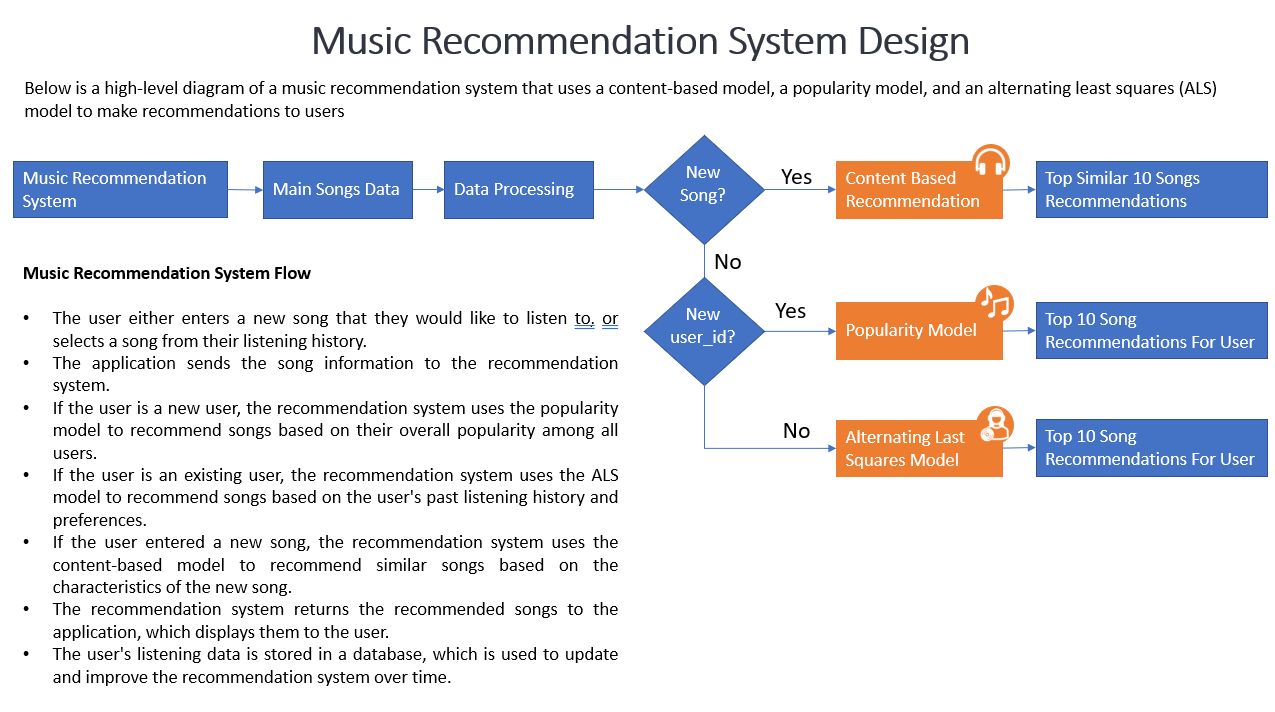